In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
!unzip './../gdrive/My Drive/Fellowship/cropped.zip' 
!unzip './../gdrive/My Drive/Fellowship/full_body_crop.zip' 

In [0]:
import pandas as pd
from fastai import *
from fastai.vision import *

labels = pd.read_csv('csv_results_similar-ai_markets_batch_csv_results.csv', index_col=False)

In [72]:
labels.head()

,file_name,labeled_class,predicted_class,prediction_confidence,image_url
0,c2bcf6d55b8132bbc5d71a43b6f65b07_5027853024132...,NaN,bassoon,0.406272,https://us-central1-platform-ai-prod.cloudfunc...
1,79bf0ea4188d82ba4f07ea009501bd1d_5587468489691...,NaN,sarong,0.316520,https://us-central1-platform-ai-prod.cloudfunc...
2,abea7e0ee235c16b4d961b2383e61c09_8427892273902...,NaN,toilet tissue,0.313929,https://us-central1-platform-ai-prod.cloudfunc...
3,b2dcf1905246d6d306bd55c758ed46b5_8530826304328...,NaN,restaurant,0.483124,https://us-central1-platform-ai-prod.cloudfunc...
4,9c9698542bcb38fe6e682da0fbfb5e6a_8711385473450...,NaN,jean,0.699312,https://us-central1-platform-ai-prod.cloudfunc...


In [0]:
tfms = get_transforms(flip_vert=False, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

#### Creating Directories based on the Label/Classes

In [0]:
classes = list(labels[['file_name', 'labeled_class']].dropna().labeled_class.unique())
## ['Boys', 'Girls', 'Babies', 'Men', 'Women']
os.mkdir('labeled_images')
for clas in classes:
    os.mkdir('labeled_images/'+clas)    

In [71]:
!tree -L 1 labeled_images/

labeled_images/
├── Babies
├── Boys
├── Girls
├── Men
├── models
└── Women

6 directories, 0 files


#### Copying files to respective directories/class folder

In [0]:
new_df = labels[['file_name', 'labeled_class']].dropna()
directory = 'cropped'
for clas in classes:
    clas_df = new_df[new_df['labeled_class']==clas]
    for i in range(len(clas_df)):
        file = clas_df['file_name'].iloc[i]
        img_path = 'cp '+directory+'/'+file+' labeled_images/'+clas+'/.'
        os.system(img_path)

In [0]:
data = (ImageList.from_folder('labeled_images')
       .split_by_rand_pct(0.2)
       .label_from_folder()
       .transform(tfms, size=128)
       .databunch()
       )
      

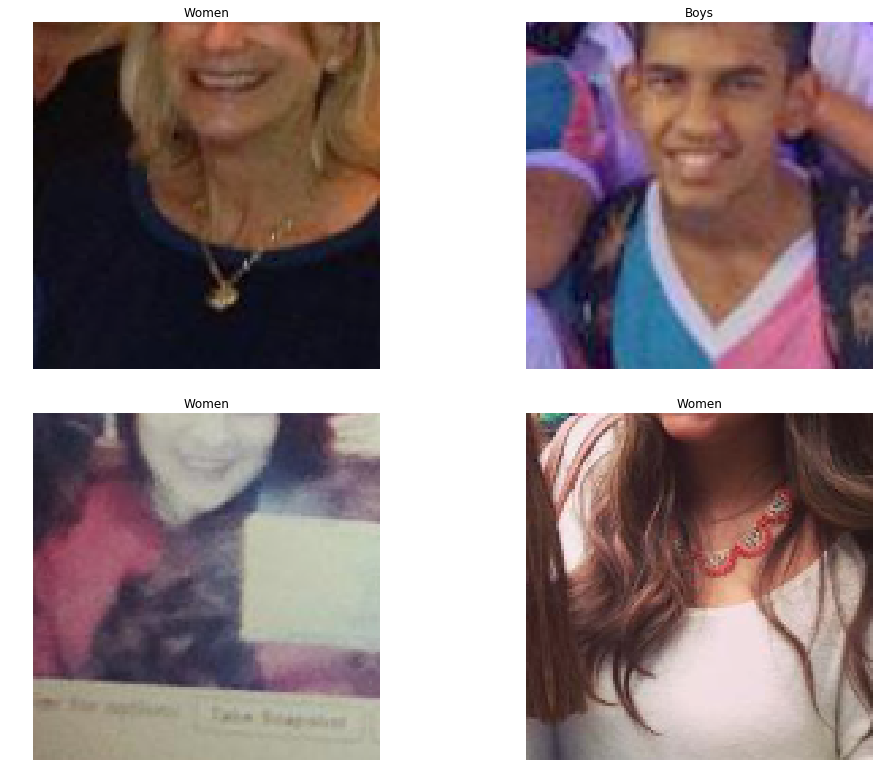

In [57]:
data.show_batch(rows=2, figsize=(15,11))

In [58]:
arch = models.resnet34
learn = cnn_learner(data, arch, metrics=[accuracy])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:04<00:00, 18315790.17it/s]


In [59]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


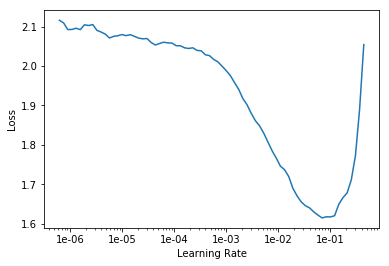

In [60]:
learn.recorder.plot()

In [0]:
lr = 1e-02

In [62]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,1.890600,1.500404,0.423423,00:02
1,1.571277,1.261411,0.603604,00:02
2,1.407851,1.417017,0.585586,00:02
3,1.328823,1.215694,0.639640,00:02
4,1.238975,1.171740,0.648649,00:02


In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


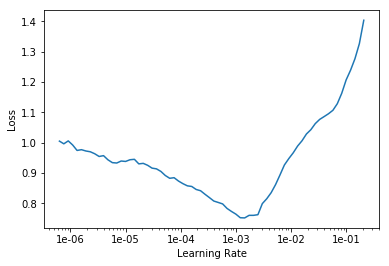

In [64]:
learn.lr_find()
learn.recorder.plot()

In [65]:
learn.fit_one_cycle(5, slice(1e-4, lr/5))

epoch,train_loss,valid_loss,accuracy,time
0,0.913046,1.261471,0.558559,00:01
1,0.896505,1.461161,0.612613,00:02
2,0.813462,1.322490,0.612613,00:02
3,0.720015,1.270040,0.630631,00:02
4,0.671566,1.118140,0.675676,00:02


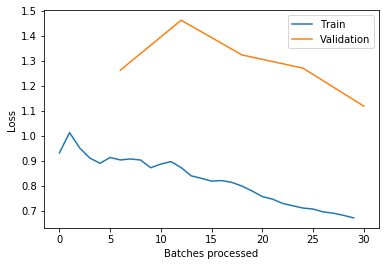

In [66]:
learn.recorder.plot_losses()